Titanic Survival Project - Mohammad Hamim

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
## Load Data
train=pd.read_csv(r'/content/train.csv')
test=pd.read_csv(r'/content/test.csv')

## Data Discriptions
- Survived: 	0 = No, 1 = Yes  
- pclass: 	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
- sibsp:	# of siblings / spouses aboard the Titanic
- parch:	# of parents / children aboard the Titanic
- ticket:	Ticket number
- cabin:	Cabin number
- embarked:	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton  

In [ ]:
train.head()
train.columns
train.shape

(891, 12)

### PassengerId

In [ ]:
train["PassengerId"].head()
train["PassengerId"].shape

train.drop(["PassengerId"],axis=1,inplace=True)
test.drop(["PassengerId"],axis=1,inplace=True)

### Pclass

In [ ]:
train["Pclass"].head()
train["Pclass"].dtype           ## int & var-type= ordinal category
train["Pclass"].isna().sum()    # No null value
train["Pclass"].isna().sum()    # No null value

train["Pclass"].value_counts()  # 1:216; 2:184; 3:491
test["Pclass"].value_counts()  # 1:107; 2:93; 3:218

Pclass
3    218
1    107
2     93
Name: count, dtype: int64

Probably independent(H1)


(-0.3235331843940954, 3.932785644652603e-24)

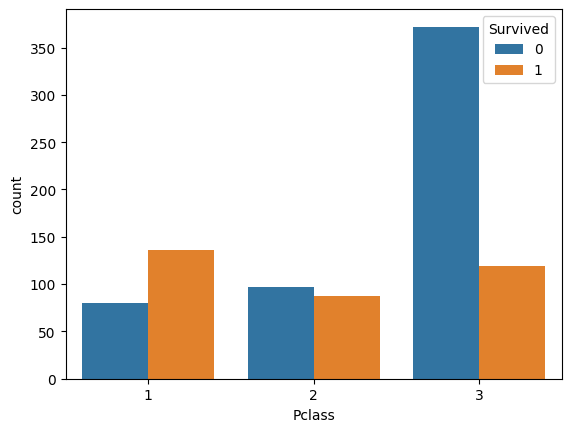

In [ ]:
## visualization
sns.countplot(x=train["Pclass"],hue=train["Survived"],data=train)

pd.crosstab(train["Survived"],train["Pclass"])

# Survival Rates with in each class: class1=.63; class2=.47; class3=.24
# Survival Rates from total survived(342): class1=.39; class2=.25; class3=.34

## Correlation: As both features are ordinal
import scipy

cor,p_value=scipy.stats.kendalltau(train["Pclass"],train["Survived"])  # cor: Kendall's tau   & p_val: p-value
if p_value > 0.05:
    print('Probably independent(H0)')
else:
    print('Probably independent(H1)')
cor,p_value


In [ ]:
# Summary
# Shows class-3 people tends to less survival chances
# Shows class-1 people tends to more survival chances

### Name

In [ ]:
train.drop(["Name"],axis=1,inplace=True)
test.drop(["Name"],axis=1,inplace=True)

In [ ]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S


### Sex:

In [ ]:
train["Sex"].shape            # total record 891
train["Sex"].isna().sum()     # No null values
test["Sex"].isna().sum()     # No null values

train["Sex"].value_counts()  # male:577; female:314
test["Sex"].value_counts()  # male:266; female:152

pd.crosstab(train["Survived"],train["Sex"])
# Survival ratio from all survived(342): Female=.68; Male=32

# Ordinal Encoding : Male=0 ; Female=1
def sex_encoder(data):
    mapper={"male":0,"female":1}
    data["Sex"]=data["Sex"].replace(mapper)
    return data

sex_encoder(train)
sex_encoder(test)

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,0,34.5,0,0,330911,7.8292,NaN,Q
1,3,1,47.0,1,0,363272,7.0000,NaN,S
2,2,0,62.0,0,0,240276,9.6875,NaN,Q
3,3,0,27.0,0,0,315154,8.6625,NaN,S
4,3,1,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...
413,3,0,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1,1,39.0,0,0,PC 17758,108.9000,C105,C
415,3,0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,3,0,NaN,0,0,359309,8.0500,NaN,S


<Axes: xlabel='Sex', ylabel='count'>

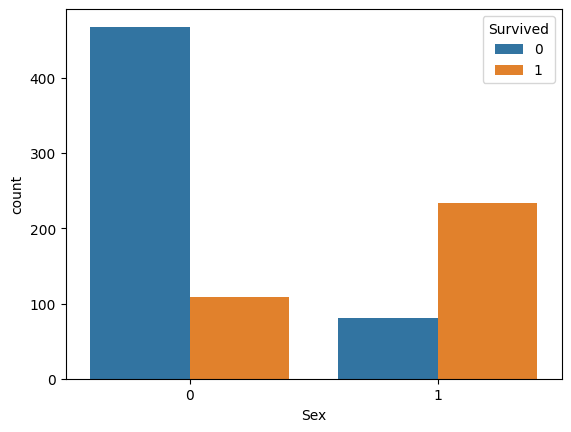

In [ ]:
## visualization
sns.countplot(x=train["Sex"],hue=train["Survived"],data=train)

In [ ]:
##   Summary
# Females are more likely to survive from this disaster

### Age

In [ ]:
train["Age"].isna().sum()    # 177 Null values
test["Age"].isna().sum()    # 86 Null values
train["Age"].describe()

## Rounding Age values
train["Age"]=round(train["Age"])+1
test["Age"]=round(test["Age"])+1

## Impute missing values
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='median')
train["Age"]=imputer.fit_transform(train[["Age"]])
test["Age"]=imputer.fit_transform(test[["Age"]])

## Changing type
train['Age']=train['Age'].astype(int)
test['Age']=test['Age'].astype(int)


<Axes: xlabel='Age', ylabel='Density'>

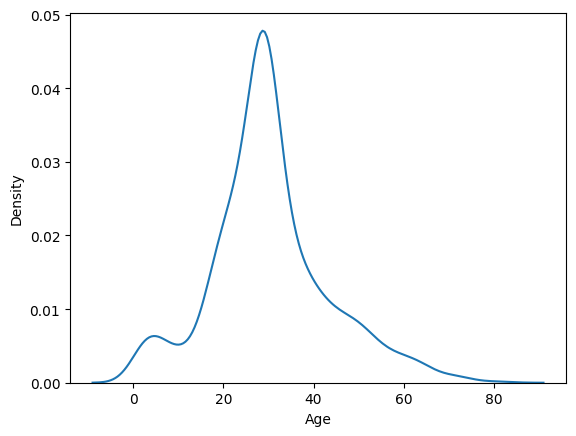

In [ ]:
## Plot
sns.kdeplot(x=train["Age"],data=train)    # Along X-axis


### SibSp:

In [ ]:
train["SibSp"].head()

train["SibSp"].isna().sum() # No null values
test["SibSp"].isna().sum() # No null values

train[["SibSp"]].info()     # int dtype

train["SibSp"].describe()

train["SibSp"].value_counts()  # [0,1,2,3,4,5,8]
pd.crosstab(train["Survived"],train["SibSp"])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   SibSp   891 non-null    int64
dtypes: int64(1)
memory usage: 7.1 KB


SibSp,0,1,2,3,4,5,8
Survived,,,,,,,
0,398,97,15,12,15,5,7
1,210,112,13,4,3,0,0


<Axes: xlabel='SibSp', ylabel='count'>

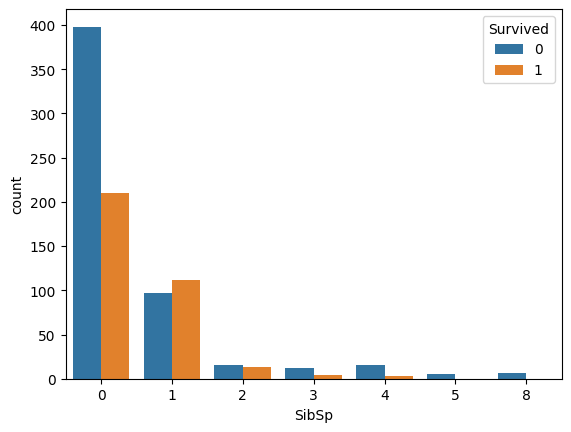

In [ ]:
## ploting
sns.countplot(x=train["SibSp"],hue=train["Survived"],data=train)

In [ ]:
## Summary
# travelling Alone(608) & Survuved(210) : .35
# travelling Not-Alone(283) & Survuved(132) : .47

# Travelling alone less survival chances

### Parch

In [ ]:
train["Parch"].head()

train["Parch"].isna().sum()     # No null value
test["Parch"].isna().sum()     # No null value

train[["Parch"]].info()         # int dtype

train["Parch"].describe()

train["Parch"].value_counts()  # [0,1,2,3,4,5,8]
pd.crosstab(train["Survived"],train["Parch"])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Parch   891 non-null    int64
dtypes: int64(1)
memory usage: 7.1 KB


Parch,0,1,2,3,4,5,6
Survived,,,,,,,
0,445,53,40,2,4,4,1
1,233,65,40,3,0,1,0


<Axes: xlabel='Parch', ylabel='count'>

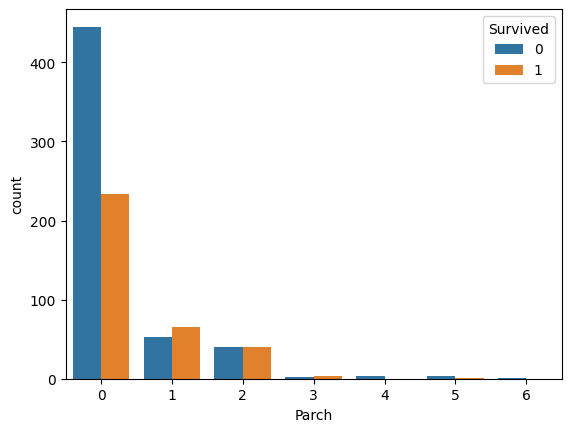

In [ ]:
## ploting
sns.countplot(x=train["Parch"],hue=train["Survived"],data=train)

In [ ]:
## Summary
# travelling Alone(678) & Survuved : .34
# travelling Not-Alone(213) & Survuved : .51

# Travelling alone less survival chances

### Family Size:

<Axes: xlabel='Family', ylabel='count'>

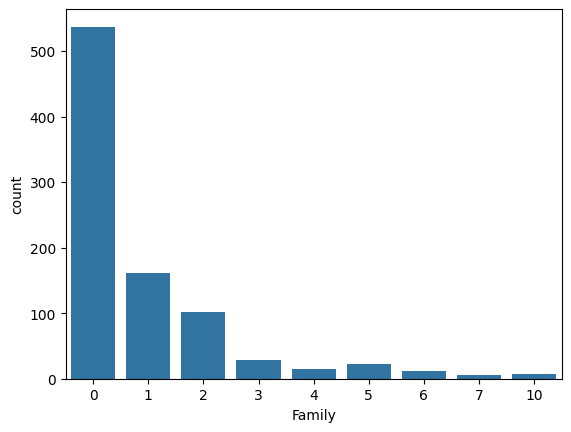

In [ ]:
train["Family"]=train["SibSp"]+train["Parch"]
test["Family"]=test["SibSp"]+test["Parch"]

sns.countplot(x="Family",data=train)

### Ticket :

In [ ]:
train.drop(["Ticket"],axis=1,inplace=True)
test.drop(["Ticket"],axis=1,inplace=True)

### Fare :

In [ ]:
train["Fare"].head()

train["Fare"].isna().sum()    # No null values
test["Fare"].isna().sum()    # 1

## Impute missing values
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='median')
test["Fare"]=imputer.fit_transform(test[["Fare"]])

train[["Fare"]].info()        # int dtype

test["Fare"].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fare    891 non-null    float64
dtypes: float64(1)
memory usage: 7.1 KB


count    418.000000
mean      35.576535
std       55.850103
min        0.000000
25%        7.895800
50%       14.454200
75%       31.471875
max      512.329200
Name: Fare, dtype: float64

<Axes: xlabel='Fare', ylabel='Density'>

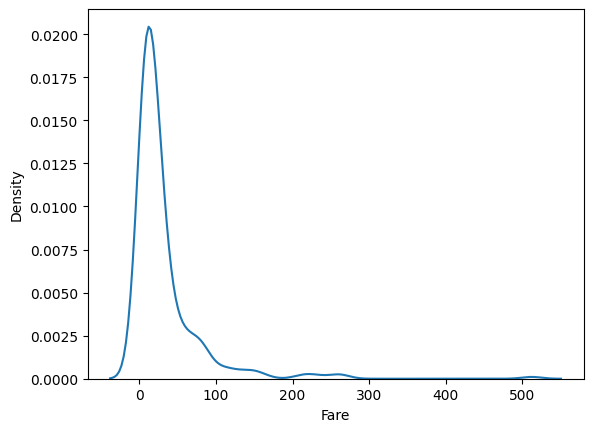

In [ ]:
## Plot
sns.kdeplot(x="Fare",data=train)    # Along X-axis

### Cabin

In [ ]:
train["Cabin"].head()

train["Cabin"].isna().sum()    # 687
test["Cabin"].isna().sum()    # 327

train.drop(["Cabin"],axis=1,inplace=True)
test.drop(["Cabin"],axis=1,inplace=True)

### Embarked

In [ ]:
train["Embarked"].head()

train["Embarked"].isna().sum()     # 2
test["Embarked"].isna().sum()     # No null value

## Filling missing values
train["Embarked"].fillna(value="C",inplace=True)

train[["Embarked"]].info()         # Ordinal Category

train["Embarked"].describe()


train["Embarked"].value_counts()  # ["C" , "Q" , "S"]
pd.crosstab(train["Survived"],train["Embarked"])

# Embarked Encoder
def embarked_encoder(data):
    df=pd.get_dummies(data=data["Embarked"],prefix='Embarked')
    data=pd.concat([data,df],axis=1)
    data.drop(["Embarked"],axis=1,inplace=True)
    return data

train=embarked_encoder(train)
test=embarked_encoder(test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Embarked  891 non-null    object
dtypes: object(1)
memory usage: 7.1+ KB


In [ ]:
print(train.columns)


Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Family',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')


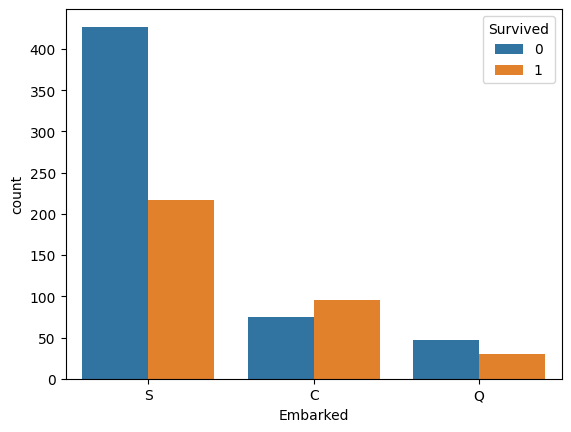

In [ ]:
## ploting
import matplotlib.pyplot as plt
def get_embarked(row):
    if row['Embarked_C'] == 1:
        return 'C'
    elif row['Embarked_Q'] == 1:
        return 'Q'
    elif row['Embarked_S'] == 1:
        return 'S'
    else:
        return 'Unknown'

train['Embarked'] = train.apply(get_embarked, axis=1)
sns.countplot(x="Embarked", hue="Survived", data=train)
plt.show()

### Survived

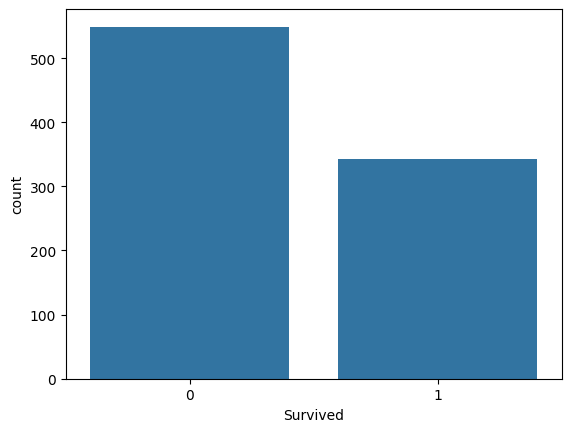

In [ ]:
train["Survived"].head()

train["Survived"].isna().sum()    # no null-values

train["Survived"].value_counts()  # 0:549; 1:342

## plot
sns.countplot(x=train["Survived"],data=train)

# cutting out "Survived" and making as target(y)
target=train.pop("Survived")

## Model Training

### Logistic Reg.

In [ ]:
print(train_encoded.dtypes)
print(test_encoded.dtypes)
print(train_encoded.isnull().sum())
print(test_encoded.isnull().sum())

PassengerId      int64
Pclass           int64
Name            object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Sex_female        bool
Sex_male          bool
Embarked_C        bool
Embarked_Q        bool
Embarked_S        bool
dtype: object
Pclass        float64
Age           float64
SibSp         float64
Parch         float64
Fare          float64
Family        float64
Embarked_C    float64
Embarked_Q    float64
Embarked_S    float64
Sex_0         float64
Sex_1         float64
dtype: object
PassengerId      0
Pclass           0
Name             0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Sex_female       0
Sex_male         0
Embarked_C       0
Embarked_Q       0
Embarked_S       0
dtype: int64
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Family        0
Embarked_C    0
Embarked_Q    0
E

In [ ]:
lr = LogisticRegression(random_state=21, multi_class="auto", C=2, dual=False, max_iter=200, penalty='l2', solver='lbfgs')

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Example of encoding categorical variables
train_encoded = pd.get_dummies(train, columns=['Sex'])
test_encoded = pd.get_dummies(test, columns=['Sex'])

# Align the columns of the train and test data
train_encoded, test_encoded = train_encoded.align(test_encoded, join='left', axis=1, fill_value=0)

# Remove the original 'Embarked' column
train_encoded = train_encoded.drop(columns=['Embarked'])
test_encoded = test_encoded.drop(columns=['Embarked'])

# Ensure all columns are numerical and convert to float
train_encoded = train_encoded.astype(float)
test_encoded = test_encoded.astype(float)

# Scale the data
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_encoded)
test_scaled = scaler.transform(test_encoded)

# Fit the Logistic Regression model with increased iterations
lr = LogisticRegression(random_state=21, multi_class="auto", C=2, dual=False, max_iter=200, penalty='l2', solver='lbfgs')
lr.fit(train_scaled, target)

# Predict using the test data
lr_pred = lr.predict(test_scaled)
lr_proba = lr.predict_proba(test_scaled)  # Probability estimates


In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

# Example of encoding categorical variables
train_encoded = pd.get_dummies(train, columns=['Sex'])

# Align the columns of the train data (assuming the test set is not used for now)
# test_encoded = pd.get_dummies(test, columns=['Sex'])  # If you want to include test set, follow similar steps

# Remove the original 'Embarked' column (if it still exists)
if 'Embarked' in train_encoded.columns:
    train_encoded = train_encoded.drop(columns=['Embarked'])

# Ensure all columns are numerical and convert to float
train_encoded = train_encoded.astype(float)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_encoded, target, test_size=0.2, random_state=21)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Fit the Logistic Regression model with increased iterations
lr = LogisticRegression(random_state=21, multi_class="auto", C=2, dual=False, max_iter=200, penalty='l2', solver='lbfgs')
lr.fit(X_train_scaled, y_train)

# Predict using the validation data
y_train_pred = lr.predict(X_train_scaled)
y_val_pred = lr.predict(X_val_scaled)
y_val_proba = lr.predict_proba(X_val_scaled)  # Probability estimates

# Calculate accuracy and ROC AUC scores
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)

train_roc_auc = roc_auc_score(y_train, lr.predict_proba(X_train_scaled)[:, 1])
val_roc_auc = roc_auc_score(y_val, y_val_proba[:, 1])

print(f"train_Accuracy : {train_accuracy}")
print(f"val_Accuracy : {val_accuracy}")
print(f"train_ROC AUC : {train_roc_auc}")
print(f"val_ROC AUC : {val_roc_auc}")


train_Accuracy : 0.8033707865168539
val_Accuracy : 0.8044692737430168
train_ROC AUC : 0.8533388799247008
val_ROC AUC : 0.8658301158301158


### SVC

In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

# Example of encoding categorical variables
train_encoded = pd.get_dummies(train, columns=['Sex'])
test_encoded = pd.get_dummies(test, columns=['Sex'])

# Align the columns of the train and test data
train_encoded, test_encoded = train_encoded.align(test_encoded, join='left', axis=1, fill_value=0)

# Remove the original 'Embarked' column (if it still exists)
if 'Embarked' in train_encoded.columns:
    train_encoded = train_encoded.drop(columns=['Embarked'])
if 'Embarked' in test_encoded.columns:
    test_encoded = test_encoded.drop(columns=['Embarked'])

# Ensure all columns are numerical and convert to float
train_encoded = train_encoded.astype(float)
test_encoded = test_encoded.astype(float)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_encoded, target, test_size=0.2, random_state=21)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
test_scaled = scaler.transform(test_encoded)

# Fit the SVM model
svc = SVC(probability=True)
svc.fit(X_train_scaled, y_train)

# Predict using the validation data
y_train_pred = svc.predict(X_train_scaled)
y_val_pred = svc.predict(X_val_scaled)
y_val_proba = svc.predict_proba(X_val_scaled)  # Probability estimates

# Calculate accuracy and ROC AUC scores
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)

train_roc_auc = roc_auc_score(y_train, svc.predict_proba(X_train_scaled)[:, 1])
val_roc_auc = roc_auc_score(y_val, y_val_proba[:, 1])

print(f"train_Accuracy : {train_accuracy}")
print(f"val_Accuracy : {val_accuracy}")
print(f"train_ROC AUC : {train_roc_auc}")
print(f"val_ROC AUC : {val_roc_auc}")

# Predict using the test data
svc_pred = svc.predict(test_scaled)
svc_proba = svc.predict_proba(test_scaled)  # Probability estimates


train_Accuracy : 0.848314606741573
val_Accuracy : 0.8156424581005587
train_ROC AUC : 0.8818197862041145
val_ROC AUC : 0.8516731016731016


### Random Forest

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

# Example of encoding categorical variables
train_encoded = pd.get_dummies(train, columns=['Sex'])
test_encoded = pd.get_dummies(test, columns=['Sex'])

# Align the columns of the train and test data
train_encoded, test_encoded = train_encoded.align(test_encoded, join='left', axis=1, fill_value=0)

# Remove the original 'Embarked' column (if it still exists)
if 'Embarked' in train_encoded.columns:
    train_encoded = train_encoded.drop(columns=['Embarked'])
if 'Embarked' in test_encoded.columns:
    test_encoded = test_encoded.drop(columns=['Embarked'])

# Ensure all columns are numerical and convert to float
train_encoded = train_encoded.astype(float)
test_encoded = test_encoded.astype(float)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_encoded, target, test_size=0.2, random_state=21)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
test_scaled = scaler.transform(test_encoded)

# Fit the Random Forest model
rf = RandomForestClassifier(
    bootstrap=True,
    class_weight='balanced_subsample',
    criterion='gini',
    max_features='log2',
    n_estimators=100
)
rf.fit(X_train_scaled, y_train)

# Predict using the validation data
y_train_pred = rf.predict(X_train_scaled)
y_val_pred = rf.predict(X_val_scaled)
y_val_proba = rf.predict_proba(X_val_scaled)  # Probability estimates

# Calculate accuracy and ROC AUC scores
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)

train_roc_auc = roc_auc_score(y_train, rf.predict_proba(X_train_scaled)[:, 1])
val_roc_auc = roc_auc_score(y_val, y_val_proba[:, 1])

print(f"train_Accuracy : {train_accuracy}")
print(f"val_Accuracy : {val_accuracy}")
print(f"train_ROC AUC : {train_roc_auc}")
print(f"val_ROC AUC : {val_roc_auc}")

# Predict using the test data
rf_pred = rf.predict(test_scaled)
rf_proba = rf.predict_proba(test_scaled)  # Probability estimates


train_Accuracy : 0.9845505617977528
val_Accuracy : 0.8212290502793296
train_ROC AUC : 0.9980376832055936
val_ROC AUC : 0.8611325611325611


In [ ]:
train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Family,Embarked_C,Embarked_Q,Embarked_S,Embarked
0,3,0,23,1,0,7.2500,1,False,False,True,S
1,1,1,39,1,0,71.2833,1,True,False,False,C
2,3,1,27,0,0,7.9250,0,False,False,True,S
3,1,1,36,1,0,53.1000,1,False,False,True,S
4,3,0,36,0,0,8.0500,0,False,False,True,S


## Model Selection :  

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif, GenericUnivariateSelect, chi2, RFECV, SequentialFeatureSelector
from sklearn.impute import SimpleImputer
import warnings

# Load your dataset (replace with your dataset loading code)
# Assume 'train.csv' has your data with 'Survived' as the target column
train = pd.read_csv('train.csv')  # Replace with your actual dataset loading code
target = train['Survived']  # Target variable
train = train.drop(columns=['Survived'])  # Drop target variable from training data

# Step 1: Drop non-numeric columns that are not useful for modeling
non_numeric_cols = ['Name', 'Ticket', 'Cabin']  # Add or remove columns as needed
train = train.drop(columns=non_numeric_cols)

# Step 2: Encode categorical variables
train_encoded = pd.get_dummies(train, drop_first=True)

# Step 3: Handle missing values
imputer = SimpleImputer(strategy='mean')  # You can choose 'median', 'most_frequent', etc.
train_imputed = imputer.fit_transform(train_encoded)

# Convert imputed data back to DataFrame and add column names
train_imputed = pd.DataFrame(train_imputed, columns=train_encoded.columns)

# Splitting into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_imputed, target, test_size=0.2, random_state=21)

# Ensure all columns are numeric (convert to float if necessary)
X_train = X_train.astype(float)
X_val = X_val.astype(float)

# Step 4: SelectKBest with f_classif
skb = SelectKBest(f_classif, k=9)
X_train_skb = skb.fit_transform(X_train, y_train)

print("SelectKBest Scores:", skb.scores_)
print("SelectKBest p-values:", skb.pvalues_)

# Step 5: GenericUnivariateSelect with chi2
gus = GenericUnivariateSelect(chi2, mode='k_best', param=5)
X_train_gus = gus.fit_transform(X_train, y_train)

print("GenericUnivariateSelect Scores:", gus.scores_)
print("GenericUnivariateSelect p-values:", gus.pvalues_)

# Step 6: Recursive Feature Elimination with Cross-Validation (RFECV)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")  # Suppress warning
rf = RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample', criterion='gini', max_features='log2', n_estimators=100)

rfecv = RFECV(rf, cv=20, n_jobs=-1, min_features_to_select=11, scoring="roc_auc")
rfecv.fit(X_train, y_train)

print("RFECV Number of Features:", rfecv.n_features_)
print("RFECV Support:", rfecv.support_)
print("RFECV Ranking:", rfecv.ranking_)
cv_results = rfecv.cv_results_
print("RFECV Estimator Info:", rfecv.estimator_)

# Step 7: Sequential Feature Selector
model = RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample', criterion='gini', max_features='log2', n_estimators=100)
sfs = SequentialFeatureSelector(model, n_features_to_select=7, direction='forward', n_jobs=-1)
sfs.fit(X_train, y_train)

print("SequentialFeatureSelector Number of Features Selected:", sfs.n_features_to_select_)

# Reduce X_train to selected features
X_train_sfs = sfs.transform(X_train)
X_val_sfs = sfs.transform(X_val)

# You can now proceed to train your model using the selected features.


SelectKBest Scores: [1.31593331e-01 8.35472617e+01 4.32460000e+00 2.11528135e-01
 4.23276125e+00 4.60309010e+01 2.95664852e+02 1.22467595e-01
 1.82572114e+01]
SelectKBest p-values: [7.16893667e-01 6.43148441e-19 3.79235216e-02 6.45713099e-01
 4.00155619e-02 2.45544523e-11 1.16502263e-55 7.26477225e-01
 2.19314023e-05]
GenericUnivariateSelect Scores: [1.96728536e+01 2.23642114e+01 2.47871551e+01 4.54308499e-01
 7.20445749e+00 3.30629551e+03 7.26178491e+01 1.11926425e-01
 4.96380648e+00]
GenericUnivariateSelect p-values: [9.18976180e-06 2.25537895e-06 6.40226893e-07 5.00295986e-01
 7.27227289e-03 0.00000000e+00 1.57349500e-17 7.37961497e-01
 2.58831717e-02]
RFECV Number of Features: 9
RFECV Support: [ True  True  True  True  True  True  True  True  True]
RFECV Ranking: [1 1 1 1 1 1 1 1 1]
RFECV Estimator Info: RandomForestClassifier(class_weight='balanced_subsample', max_features='log2')
SequentialFeatureSelector Number of Features Selected: 7


## Hyperparameter Tuning:

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

# Load your dataset (replace with your dataset loading code)
# Assume 'train.csv' has your data with 'Survived' as the target column
train = pd.read_csv('train.csv')  # Replace with your actual dataset loading code
target = train['Survived']  # Target variable
train = train.drop(columns=['Survived'])  # Drop target variable from training data

# Step 1: Drop non-numeric columns that are not useful for modeling
non_numeric_cols = ['Name', 'Ticket', 'Cabin']  # Add or remove columns as needed
train = train.drop(columns=non_numeric_cols)

# Step 2: Encode categorical variables
train_encoded = pd.get_dummies(train, drop_first=True)

# Step 3: Handle missing values
imputer = SimpleImputer(strategy='mean')  # You can choose 'median', 'most_frequent', etc.
train_imputed = imputer.fit_transform(train_encoded)

# Convert imputed data back to DataFrame and add column names
train_imputed = pd.DataFrame(train_imputed, columns=train_encoded.columns)

# Splitting into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_imputed, target, test_size=0.2, random_state=21)

# Ensure all columns are numeric (convert to float if necessary)
X_train = X_train.astype(float)
X_val = X_val.astype(float)

# Define the parameter grid for GridSearchCV
param_grid = {
    "criterion": ["gini", "entropy"],
    "max_features": ["auto", "sqrt", "log2"],
    "class_weight": ["balanced", 'balanced_subsample'],
    "n_estimators": [50, 100, 150, 200, 250, 300, 400, 500],
    "bootstrap": [True, False]
}

# Initialize the RandomForestClassifier
model = RandomForestClassifier()

# Initialize GridSearchCV with the model and parameter grid
gscv = GridSearchCV(model, param_grid, cv=10, verbose=0, refit=False)

# Fit GridSearchCV on the training data
best = gscv.fit(X_train, y_train)

# Output the best parameters and best score
print("Best Parameters:", best.best_params_)
print("Best Score:", best.best_score_)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best Parameters: {'bootstrap': True, 'class_weight': 'balanced_subsample', 'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 100}
Best Score: 0.8440532081377151


In [ ]:
#best.best_estimator_               ## best model(if refit=True)
best.best_score_                   ## mean cv score((if refit=True))
best.best_params_

{'bootstrap': True,
 'class_weight': 'balanced_subsample',
 'criterion': 'gini',
 'max_features': 'log2',
 'n_estimators': 100}

## Calibration Curve

Brier score Logistic Regression: 0.08
Brier score SVC: 0.08
Brier score Random Forest: 0.08


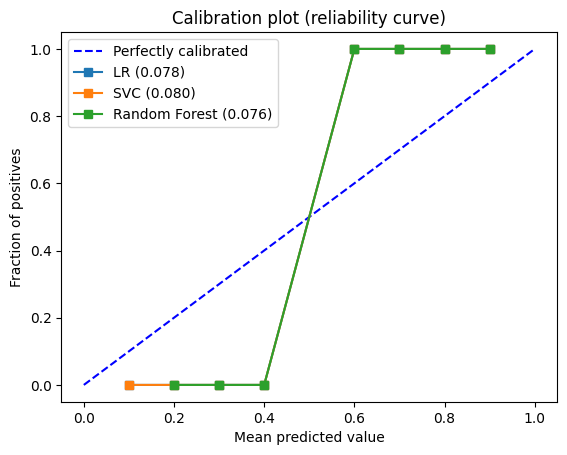

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import brier_score_loss
from sklearn.calibration import calibration_curve

# Assuming you have your true labels and predicted probabilities defined as follows:
# true_labels: ground truth labels
# lr_proba, svc_proba, rf_proba: predicted probabilities for Logistic Regression, SVC, and Random Forest respectively

true_labels = [0, 1, 0, 1, 0, 1, 0, 1, 0, 1]  # Replace with your actual true labels
lr_proba = [0.1, 0.7, 0.3, 0.8, 0.2, 0.6, 0.4, 0.9, 0.3, 0.7]  # Replace with your predicted probabilities for Logistic Regression
svc_proba = [0.2, 0.6, 0.4, 0.9, 0.3, 0.8, 0.1, 0.7, 0.2, 0.6]  # Replace with your predicted probabilities for SVC
rf_proba = [0.3, 0.8, 0.2, 0.7, 0.4, 0.9, 0.3, 0.6, 0.2, 0.8]  # Replace with your predicted probabilities for Random Forest

# Calibration Plot
fig = plt.figure()
ax = fig.add_subplot()

ax.plot([0, 1], [0, 1], "b--", label="Perfectly calibrated")
ax.set_ylabel("Fraction of positives")
ax.set_xlabel("Mean predicted value")
ax.set_title('Calibration plot (reliability curve)')

# Logistic Regression
lr_score = brier_score_loss(true_labels, lr_proba)
fraction_of_positives, mean_predicted_value = calibration_curve(true_labels, lr_proba, n_bins=10)
ax.plot(mean_predicted_value, fraction_of_positives, "s-", label="%s (%0.3f)" % ('LR', lr_score))
print("Brier score Logistic Regression: %0.2f" % lr_score)

# SVC
svc_score = brier_score_loss(true_labels, svc_proba)
fraction_of_positives, mean_predicted_value = calibration_curve(true_labels, svc_proba, n_bins=10)
ax.plot(mean_predicted_value, fraction_of_positives, "s-", label="%s (%0.3f)" % ('SVC', svc_score))
print("Brier score SVC: %0.2f" % svc_score)

# Random Forest
rf_score = brier_score_loss(true_labels, rf_proba)
fraction_of_positives, mean_predicted_value = calibration_curve(true_labels, rf_proba, n_bins=10)
ax.plot(mean_predicted_value, fraction_of_positives, "s-", label="%s (%0.3f)" % ('Random Forest', rf_score))
print("Brier score Random Forest: %0.2f" % rf_score)

ax.legend(loc="upper left")
plt.show()


In [ ]:
target.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

## Model Calibration :

In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV

# Create a sample dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model (e.g., Logistic Regression)
model = LogisticRegression()

# Calibrate the model
calibrator = CalibratedClassifierCV(model, cv=3)
calibrator.fit(X_train, y_train)

# Predict probabilities
proba = calibrator.predict_proba(X_test)

print("Predicted probabilities:\n", proba)


Predicted probabilities:
 [[3.97060728e-01 6.02939272e-01]
 [1.82202594e-01 8.17797406e-01]
 [5.17226472e-01 4.82773528e-01]
 [2.19970024e-01 7.80029976e-01]
 [8.31319122e-02 9.16868088e-01]
 [9.08301300e-01 9.16987001e-02]
 [7.42070835e-01 2.57929165e-01]
 [2.23436094e-01 7.76563906e-01]
 [2.96335657e-01 7.03664343e-01]
 [6.15445277e-01 3.84554723e-01]
 [8.28840256e-02 9.17115974e-01]
 [4.56198553e-01 5.43801447e-01]
 [9.89177498e-01 1.08225017e-02]
 [5.25391920e-01 4.74608080e-01]
 [3.23343435e-01 6.76656565e-01]
 [7.54684586e-01 2.45315414e-01]
 [8.88311921e-01 1.11688079e-01]
 [8.77455353e-02 9.12254465e-01]
 [1.62847129e-01 8.37152871e-01]
 [5.33372160e-01 4.66627840e-01]
 [1.65571769e-02 9.83442823e-01]
 [7.48126251e-01 2.51873749e-01]
 [9.24153989e-01 7.58460107e-02]
 [8.77906801e-01 1.22093199e-01]
 [4.72422332e-02 9.52757767e-01]
 [9.85104472e-01 1.48955285e-02]
 [2.18528822e-03 9.97814712e-01]
 [1.00107867e-01 8.99892133e-01]
 [9.69976258e-01 3.00237418e-02]
 [6.21130876e-02 

## Model Evaluation :

In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Create a sample dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model (e.g., RandomForestClassifier)
model3 = RandomForestClassifier(random_state=42)

# Evaluate accuracy score using cross-validation
accuracy_train_scores = cross_val_score(model3, X_train, y_train, cv=20, scoring="accuracy")
print("Train Accuracy:", round(accuracy_train_scores.mean(), 2))

# Train the model to get predictions on test set
model3.fit(X_train, y_train)
y_pred = model3.predict(X_test)

# Evaluate accuracy score on the test set using cross-validation
# Note: This should typically be done using separate validation data, but for the sake of example:
accuracy_test_scores = cross_val_score(model3, X_test, y_pred, cv=20, scoring="accuracy")
print("Test Accuracy:", round(accuracy_test_scores.mean(), 2))

# Evaluate ROC AUC score using cross-validation
rocauc_train_scores = cross_val_score(model3, X_train, y_train, cv=20, scoring="roc_auc")
print("Train ROC AUC:", round(rocauc_train_scores.mean(), 2))

# Evaluate ROC AUC score on the test set using cross-validation
rocauc_test_scores = cross_val_score(model3, X_test, y_pred, cv=20, scoring="roc_auc")
print("Test ROC AUC:", round(rocauc_test_scores.mean(), 2))


Train Accuracy: 0.9
Test Accuracy: 0.96
Train ROC AUC: 0.95
Test ROC AUC: 0.99


## Transform prediction for kaggle submision:


In [ ]:
submission=pd.DataFrame({"Survived":y_pred})
submission.to_csv('submission_v0.csv',index=False)
#"PassengerId":test["PassengerId"],

In [ ]:
submission=pd.read_csv('submission_v0.csv')
submission

,Survived
0,1
1,1
2,0
3,1
4,1
...,...
195,1
196,1
197,1
198,0


In [ ]:
## Saving Model

In [ ]:
import pickle
pickle_out=open("titanic_v0.pkl","wb")
pickle.dump(model,pickle_out)
pickle_out.close()

Copyright - Mohammad Hamim